# Khám phá mối quan hệ trong dữ liệu

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import statsmodels.api as sm
import warnings

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

## Đọc dữ liệu từ file csv vào dataframe

In [2]:
data = pd.read_csv("../datasets/data_preprocess.csv", index_col = 0)
data.head()

film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
0       1492          304      3900000            26            0          4   
1       1492          352      3360000            42            0          5   
2       1492          489      2560000            32            0          4   
3       1492          429      1200000            12            0          1   
4       1492          524      1200000            15            0          3   

   occu_perc  ticket_price  ticket_use    capacity        date  month  \
0       4.26      150000.0          26  610.328638  2018-05-05      5   
1       8.08       80000.0          42  519.801980  2018-05-05      5   
2      20.00       80000.0          32  160.000000  2018-05-05      5   
3      11.01      100000.0          12  108.991826  2018-05-05      5   
4      16.67       80000.0          15   89.982004  2018-05-05      5   

   quarter  day  
0        2    5  
1        2    5  
2        2    5  
3        2    5  
4        2    5

In [3]:
data['date'] = pd.to_datetime(data['date'])
data[['film_code', 'cinema_code']] = data[['film_code', 'cinema_code']].astype(str)
data

film_code cinema_code  total_sales  tickets_sold  tickets_out  \
0           1492         304      3900000            26            0   
1           1492         352      3360000            42            0   
2           1492         489      2560000            32            0   
3           1492         429      1200000            12            0   
4           1492         524      1200000            15            0   
...          ...         ...          ...           ...          ...   
142519      1569         495      1320000            22            0   
142520      1569         474      1200000            15            0   
142521      1569         524      1060000             8            0   
142522      1569         529       600000             5            0   
142523      1569         486       250000             5            0   

        show_time  occu_perc  ticket_price  ticket_use    capacity       date  \
0               4       4.26      150000.0          26  610.328638 2018-05-05   
1               5       8.08       80000.0          42  519.801980 2018-05-05   
2               4      20.00       80000.0          32  160.000000 2018-05-05   
3               1      11.01      100000.0          12  108.991826 2018-05-05   
4               3      16.67       80000.0          15   89.982004 2018-05-05   
...           ...        ...           ...         ...         ...        ...   
142519          2       3.86       60000.0          22  569.948187 2018-11-04   
142520          1      65.22       80000.0          15   22.999080 2018-11-04   
142521          3       9.20      132500.0           8   86.956522 2018-11-04   
142522          2       5.00      120000.0           5  100.000000 2018-11-04   
142523          1       1.79       50000.0           5  279.329609 2018-11-04   

        month  quarter  day  
0           5        2    5  
1           5        2    5  
2           5        2    5  
3           5        2    5  
4           5        2    5  
...       ...      ...  ...  
142519     11        4    4  
142520     11        4    4  
142521     11        4    4  
142522     11        4    4  
142523     11        4    4  

[142418 rows x 14 columns]

### Doanh thu trung bình của các ngày trong tháng

**Trường dữ liệu: `day`, `total_sales`**
- Lý do chọn biểu đồ:
  - Biểu đồ cột có thể dễ dàng thấy và so sánh được giữa các ngày trong tháng

In [4]:
df = data.groupby(['day'])['total_sales'].mean()

fig = px.bar(df, x=df.index, y="total_sales", 
       title="Doanh thu trung bình các ngày trong tháng",
       labels={"total_sales": "Trung bình doanh thu", "day": "Ngày trong tháng"})

fig.update_xaxes(tickmode='linear')
fig.show()


**Nhận xét:**
  * Sự chênh lệch giữa các ngày trong tháng không quá nhiều. Chỉ có ngày 8, 15, 21 có vẻ bị thấp hơn so với các ngày còn lại, nguyên nhân có thể do các ngày này rơi nhiều vào thứ bảy và chủ nhật.

### Xếp hạng phim theo doanh thu

**Trường dữ liệu: `film_code`, `total_sales`**
- Lý do chọn biểu đồ:
  - Biểu đồ cột có thể dễ dàng thấy và so sánh được doanh thu giữa các phim

In [5]:
df = data.groupby(['film_code'])['total_sales'].sum().sort_values(ascending=True)

fig = px.bar(df, x='total_sales', y=df.index,
       height=1000, 
       title="Xếp hạng phim theo doanh thu",
       labels={"total_sales": "Tổng doanh thu", "film_code": "Mã phim"})

fig.update_yaxes(tickmode='linear')
fig.show()


**Nhận xét:**
  * Phim có doanh thu cao nhất chênh lệch rất nhiều so với các phim còn lại (gấp hơn 2 lần doanh thu phim ở vị trí thứ 2). Dựa trên doanh thu, có thể thấy được bộ phim ở vị trí dẫn đầu chắc chắn là bộ phim rất hay, nổi bật, được khán giả yêu thích và đáng để xem.
  * Các bộ phim ở trong top 10 đều có doanh thu trên 50,000 M. Ở các mốc top 1, top 5 và top 8 thì sự chênh lệch doanh thu khá lớn, ngoài ra thì tổng quan sự chênh lệch giữa các bộ phim xếp hạng kế nhau là không quá lớn. 

### Xếp hạng phim theo tỉ lệ hủy vé

**Trường dữ liệu: `film_code`, `tickets_out`, `tickets_sold`**
- Lý do chọn biểu đồ:
  - Biểu đồ cột có thể dễ dàng thấy và so sánh được tỉ lệ hủy vé giữa các phim

In [6]:
df = data.groupby(['film_code']).agg({'tickets_out': 'sum', 'tickets_sold': 'sum'})
df['tickets_out_percent'] =(df['tickets_out'] / df['tickets_sold']) * 100

fig = px.bar(df.sort_values(by='tickets_out_percent', ascending=True), x='tickets_out_percent', y=df.index,
       height=1000, 
       title="Xếp hạng phim theo tỉ lệ hủy vé",
       labels={"tickets_out_percent": "Tỉ lệ hủy vé (%)", "y": "Mã phim"})

fig.update_yaxes(tickmode='linear')
fig.show()

**Nhận xét:**
  * Bộ phim có mã 1550 có tỉ lệ hủy vé cao nhất (gấp hơn 4 lần so với phim ở vị trí thứ 2). Tỉ lệ hủy vé cao như thế này chắc chắn không phải do nguyên nhân khách quan, việc hủy vé từ khán giả có thể do chất lượng của bộ phim.
  * Nhìn chung ở các bộ phim còn lại đều có tỉ lệ hủy vé thấp (dưới 0.5 %). Tỉ lệ này khá thấp nên nguyên nhân chủ yếu có thể do từ các yếu tố khách quan (bận đột xuất,...)

### Các biến động của phim có doanh thu cao nhất theo thời gian

**Trường dữ liệu: `film_code`, `month`, `tickets_sold`, `total_sales`, `ticket_price`**
- Lý do chọn biểu đồ:
  - Biểu đồ đường có thể dễ dàng thấy được biến động theo thời gian

In [7]:
df = data[data['film_code'] == '1554']
df = df.groupby(['month']).agg({'total_sales': 'sum', 'ticket_price': 'mean', 'tickets_sold': 'sum'}).reset_index()

fig = make_subplots(rows=3, cols=1, x_title='Tháng', vertical_spacing = 0.1)

fig.add_trace(go.Scatter(x=df.month, y=df.total_sales, name='Doanh thu'),
              1, 1)
fig.add_trace(go.Scatter(x=df.month, y=df.tickets_sold, name='Số lượng vé đã bán'),
              2, 1)
fig.add_trace(go.Scatter(x=df.month, y=df.ticket_price, name='Giá vé'),
              3, 1)

fig['layout']['yaxis']['title']='Doanh thu'
fig['layout']['yaxis2']['title']='Số lượng vé đã bán'
fig['layout']['yaxis3']['title']='Giá vé'

fig.update_layout(height=800,
                  title_text="Các biến động của phim có doanh thu cao nhất theo thời gian")


**Nhận xét:**
  * Doanh thu của bộ phim ở 1 tháng đầu là cao nhất, giảm mạnh ở 1 tháng sau đó và giảm chậm ở thời gian tiếp theo. Nguyên nhân là do ở 1 tháng đầu là thời gian bộ phim vừa phát hành nên rất hot, lượng người xem là rất cao. Ở tháng tiếp theo thì lượng người đã xem ở tháng đầu là rất nhiều nên doanh thu ở thời gian này bị giảm mạnh.
  * Lượng vé bán ra khá tương đồng với doanh thu của nó. Đây cũng có thể giải thích được biến động của doanh thu như trên.
  * Giá vé lại thấp ở thời gian mới phát hành và tăng dần thời gian sau đó. Có thể do sau thời gian dài phát hành, các rạp chiếu bộ phim này rất ít nên giá vé sẽ tăng cao, tuy nhiên việc giá vé tăng cao lại không giúp doanh thu tăng theo, do lượng vé bán ra vào thời gian này là rất ít. 

### Tổng vé bán theo phim theo thời gian

**Trường dữ liệu**
- `tickets_sold`, `date`, `film_code`

**Lý do chọn biểu đồ**
- Biểu đồ line phù hợp biểu diễn cho dữ liệu dạng timeseries. Tuy nhiên do có quá nhiều giá trị film_code nên sẽ làm rối mắt. Vì vậy ta sẽ chỉ vẽ 5 phim có tổng vé bán cao nhất và gộp tất cả các phim còn lại như 1 bộ phim.

**Lý do chọn màu sắc**
- Mỗi film_code 1 màu khác nhau, để dễ phân biệt

In [56]:
#Tìm top 5 phim và thay đổi gộp các phim nhỏ lẻ khác.
top_films = data.groupby("film_code")["tickets_sold"].sum().sort_values(ascending = False)
top_films = top_films.head(5).index

data_top_films = data.copy()
data_top_films.loc[~data_top_films["film_code"].isin(top_films), "film_code"] = "Other"

In [57]:
# Gom nhóm dữ liệu theo mã phim và theo ngày.
data_film = data_top_films.groupby(["film_code", "date"])["tickets_sold"].sum().reset_index()
data_film = data_film.sort_values(by=['film_code', 'date'], ascending=[True, True])

In [58]:
# Vẽ biểu đồ lineplot
fig = px.line(data_film, x='date', y='tickets_sold', color='film_code',
              labels={'date': 'Ngày', 'tickets_sold': 'Số vé bán'},
              title='Số vé bán theo thời gian - Các phim')

fig.show()

**Nhận xét**
- Dữ liệu có dạng răng cưa, chứng tỏ 2 ngày liền kề thì sẽ chênh lệch nhau rất nhiều. Chứng tỏ phim thường không được chiếu liên tục trong tuần mà nhiều nơi sẽ chiếu theo lịch 2 ngày 1 lần.
- Nết xét trong 1 đoạn thời gian ngắn, dữ liệu có tính chu kỳ. Chu kỳ này đó chính là theo tuần, tại vì lịch chiếu phim thường phân bố các ngày cố định trong tuần (chẳng hạn thứ 3 6 cn).
- Điểm thú vị đó chính là mọi bộ phim đều thường có đỉnh răng cưa và đáy răng cưa ở cùng 1 ngày => Muốn riêng tư, ít người thì lựa những ngày đáy răng cưa (tuy nhiên ngày đó phải có phim của mình )
- Xét tổng thể, những phim nổi sẽ chênh lệch rất nhiều so với các phim khác (ví dụ phim 1554), vào thời điểm tháng 7-9, số vé bán của bộ phim này lớn hơn nhiều so với tổng vé bán của tất cả các phim còn lại.
- Một phim nổi tiếng và có số vé bán cao sẽ là niềm bất hạnh của các phim khác chiếu trong cùng thời gian. Thời gian từ tháng 7-9, phim 1554 chiếm hầu hết các vé bán, các phim còn lại rất ít vé bán. Trong khi ở những khoảng thời gian còn lại, có nhiều phim cùng đạt số lượng vé cao. Những tháng mùa đông thì bộ phim trong top 5 nhỏ hơn nhiều so với tổng các bộ phim còn lại.


### Tổng vé bán theo thời gian kể từ ngày công chiếu

Để trả lời câu hỏi này, chúng ta cần thêm cột `date_from_start` có giá trị là số ngày cách biệt kể từ ngày hôm đó đến ngày đầu tiên phim đó được công chiếu.

In [59]:
data_min_date = data_top_films.groupby('film_code')['date'].min()
data_top_films['date_from_start'] = data_top_films.apply(lambda row: 
                                               (row['date']- data_min_date[row['film_code']]).days, axis=1)


**Trường dữ liệu**
- `tickets_sold`, `date_from_start`, `film_code`

**Lý do chọn biểu đồ**
- Biểu đồ line phù hợp biểu diễn cho dữ liệu dạng timeseries. Tuy nhiên do có quá nhiều giá trị film_code nên sẽ làm rối mắt. Vì vậy ta sẽ chỉ vẽ 5 phim có tổng vé bán cao nhất và gộp tất cả các phim còn lại như 1 bộ phim.

**Lý do chọn màu sắc**
- Mỗi film_code 1 màu khác nhau, để dễ phân biệt

In [61]:
data_occu_perc = data_top_films.groupby(["film_code", "date_from_start"])["tickets_sold"].mean().reset_index()
data_occu_perc = data_occu_perc.sort_values(by=['film_code', 'date_from_start'], ascending=[True, False])

In [62]:
fig = px.line(data_occu_perc, x='date_from_start', y='tickets_sold', color='film_code', 
              title='Tổng vé bán theo phim kể từ ngày công chiếu', 
              labels={'date_from_start': 'Ngày', 'tickets_sold': 'Số vé bán'})
fig.show()


**Nhận xét**
- Biểu đồ cho thấy được số vé bán của mỗi bộ phim thay đổi như thế nào khi càng xa ngày công chiếu
- Theo càng xa ngày công chiếu, số vé bán của mỗi bộ phim có xu hướng giảm dần. Tuy nhiên có trường hợp đặc biệt là phim 1484, những ngày cuối có số vé bán tăng 1 cách kỳ lạ.
- Biểu đồ có dạng răng cưa và có tính chu kỳ, điều này là do mỗi bộ phim thường được công chiếu vào một số ngày cố định trong tuần.


### Tỷ lệ chiếm rạp theo phim

**Trường dữ liệu**
- `occu_perc`, `date`, `film_code`

**Lý do chọn biểu đồ**
- Biểu đồ line phù hợp biểu diễn cho dữ liệu dạng timeseries. Tuy nhiên do có quá nhiều giá trị film_code nên sẽ làm rối mắt. Vì vậy ta sẽ chỉ vẽ 5 phim có tổng vé bán cao nhất và gộp tất cả các phim còn lại như 1 bộ phim.

**Lý do chọn màu sắc**
- Mỗi film_code 1 màu khác nhau, để dễ phân biệt

In [63]:
data_film = data_top_films.groupby(["film_code", "date"])["occu_perc"].mean().reset_index()
data_film = data_film.sort_values(by=['film_code', 'date'], ascending=[True, False])

In [64]:
fig = px.line(data_film, x='date', y='occu_perc', color='film_code', title='Tỷ lệ chiếm rạp theo phim',
             labels={'date': 'Ngày', 'occu_prec': 'Tỷ lệ chiếm chỗ'})
fig.show()

**Nhận xét**
- Biểu đồ hơi khó nhìn, vì tỷ lệ chiếm chỗ của các bộ phim có giá trị gần gần nhau, không chênh lệch nhiều.
- Tỷ lệ chiếm rạp không chênh lệch nhiều, nhưng tổng số vé bán thì lại chênh lệch rất nhiều. Chứng tỏ không phải mỗi rạp phim đều chiếu các loại phim như nhau, phim nào hay thì sẽ được chiếu ở nhiều rạp. 
-  Cũng như tổng số vé bán, tỷ lệ chiếm rạp cũng có dạng răng cưa, và nếu xét trong 1 khoảng thời gian ngắn thì nó có chu kỳ.
- Tại mỗi thời điểm, luôn có nhiều phim có tỷ lệ bao rạp cao. Khác với tổng số vé, khi một phim số vé cao thì sẽ ảnh hưởng các phim còn lại, tỷ lệ bao rạp thì sẽ không. Nó được điều chỉnh để cao nhất có thể, khi phim đó ít nổi, thì nó sẽ ít được chiếu lại.

### Tỷ lệ chiếm rạp theo phim kể từ ngày công chiếu

**Trường dữ liệu**
- `occu_perc`, `date_from_start`, `film_code`

**Lý do chọn biểu đồ**
- Biểu đồ line phù hợp biểu diễn cho dữ liệu dạng timeseries. Tuy nhiên do có quá nhiều giá trị film_code nên sẽ làm rối mắt. Vì vậy ta sẽ chỉ vẽ 5 phim có tổng vé bán cao nhất và gộp tất cả các phim còn lại như 1 bộ phim.

**Lý do chọn màu sắc**
- Mỗi film_code 1 màu khác nhau, để dễ phân biệt

In [65]:
data_occu_perc = data_top_films.groupby(["film_code", "date_from_start"])["occu_perc"].mean().reset_index()
data_occu_perc = data_occu_perc.sort_values(by=['film_code', 'date_from_start'], ascending=[True, False])

In [69]:
fig = px.line(data_occu_perc, x='date_from_start', y='occu_perc', color='film_code', 
              title='Tỷ lệ chiếm rạp theo phim kể từ ngày công chiếu',
             labels={'date_from_start': 'Ngày', 'occu_perc': 'Tỷ lệ chiếm chỗ'})
fig.show()



**Nhận xét**
- Một bộ phim sẽ không vì được chiếu lâu rồi mà tỷ lệ chiếm rạp bị giảm, tỷ lệ này không có giảm theo thời gian mà khác nhau theo từng bộ phim. Ví dụ các bộ phim 1482, 1484, 1554 có xu hướng giảm rồi tăng. Trong khi Other (bao gồm mấy chục bộ phim) thì có xu hướng tăng giảm không ổn định.
- Nhận thấy mỗi bộ phim được chiếu lâu ngày thì số vé bán sẽ giảm nhưng mà rất nhiều bộ phim có tỷ lệ chiếm rạp lại tăng. Như vậy bộ phim chiếu càng lâu thì số rạp chiếu phim đó càng ít.


### Số lượng các bộ phim được chiếu theo thời gian

**Trường dữ liệu**
- `date`, `film_code`

**Lý do chọn biểu đồ**
- Biểu đồ tốt nhất để trực quan dữ liệu time series là line chart. Tuy nhiên, do trong dataset của chúng ta có những ngày không có dữ liệu, thế nên không thể trực quan theo hằng ngày bằng line chart được, lúc này muốn thể hiện đầy đủ dữ liệu lên biểu đồ thì scatter là lựa chọn hợp lý nhất. 
- Vì dữ liệu trong ngày có thể thiếu, nhưng dữ liệu trong tháng thì luôn đầy đủ nên ở biểu đồ thứ 2 có thể sử dụng line chart. Hơn nữa, thời gian một bộ phim được chiếu đều rất lâu, có thể tính theo đơn vị tháng, thế nên việc nhóm dữ liệu lại theo tháng cũng là hợp lý. 

Đầu tiên ta vẽ scatter plot trực quan số các bộ phim khác nhau được chiếu trong ngày.

In [17]:
n_film_by_date = data.groupby('date')['film_code'].nunique().reset_index()

In [18]:
fig = px.scatter(n_film_by_date, x='date', y='film_code', 
              title='Số lượng các bộ phim được chiếu trong ngày theo thời gian')

fig.update_layout(xaxis_title='thời gian',
                  yaxis_title='Số lượng')

fig.show()

Tiếp theo chúng ta vẽ line chart để trực quan số phim được chiếu trong tháng theo thời gian, line chart giúp ta dễ dàng rút ra được sự biến đổi của dữ liệu theo thời gian.

In [19]:
n_film_by_month = data.groupby('month')['film_code'].nunique().reset_index()

In [20]:
fig = px.line(n_film_by_month, x='month', y='film_code', 
              title='Số lượng các bộ phim được chiếu trong tháng theo thời gian')

fig.update_layout(xaxis_title='tháng',
                  yaxis_title='Số lượng')

fig.show()

**Nhận xét**
- Việc sử dụng plotly để trực quan giúp ta có thể tương tác được với biểu đồ, chọn các mốc thời gian khác nhau, gúp quan sát chi tiết hơn.
- Số phim được chiếu trong tháng theo thời gian là không giống nhau.
- Ở đoạn khoảng tháng 2,3 số lượng ít là do dữ liệu của chúng ta không đầy đủ (Dữ liệu của chúng ta bắt đầu từ cuối tháng 2, và dữ liệu của tháng 3 cũng chỉ có nửa tháng sau) 
- Từ tháng 4 đến tháng 6 số lượng phim ít, nhưng tăng dần. Chứng tỏ rất có 1 phim rất hay được chiếu trong tháng 4, nó kéo dài đến tháng 6. Vì phim này có nhiều người đi xem nên các rạp tập trung mở nhiều suất chiếu cho phim này, các phim khác cũng chiếu ở thời gian khác nếu không muốn bị ít khán giả do họ đều đi xem phim hay kia rồi. Các tháng này không có nhiều phim để xem, đa phần đều đi xem phim là xem bộ phim kia.
- Từ tháng 7 trở đi, ở scatter plot chúng ta có thể thấy dữ liệu biến động khá nhiều (ở các tháng trước thì rất nhiều ngày liên tiếp nhau có cùng giá trị), chứng tỏ rất thường xuyên có việc phim cũ ngừng chiếu, phim mới bắt đầu chiếu. Các tháng này có rất nhiều phim để xem.

**Kiểm chứng phim nhiều lượt xem nhất có phải chiếu ở tháng 4 hay không**

In [21]:
# số lượng vé bán của mỗi phim
sales_data = data.groupby('film_code')['tickets_sold'].sum()

# film có số vé bán được nhiều nhất
film_max = sales_data[sales_data == max(sales_data)].index.values[0]

# ngày bắt đầu chiếu phim bán được chiếu vé nhất (được xem nhiều nhất)
data[data['film_code'] == film_max]['date'].min()

Timestamp('2018-07-04 00:00:00')

### Số suất chiếu phim theo thời gian của các rạp

**Trường dữ liệu**
- `date`, `show_time`

**Lý do chọn biểu đồ**
- Biểu đồ tốt nhất để trực quan dữ liệu time series là line chart. Tuy nhiên, do trong dataset của chúng ta có những ngày không có dữ liệu, thế nên không thể trực quan theo hằng ngày bằng line chart được, lúc này scatter là lựa chọn hợp lý nhất. Chúng ta cũng có thể xem số suất chiếu phim trong ngày theo thời gian qua scatter plot.
- Vì dữ liệu trong ngày có thể thiếu, nhưng dữ liệu trong tuần thì luôn đầy đủ, ở biểu đồ thứ 2 chúng ta có thể trực quan số suất chiếu trong tuần theo thời gian bằng line chart.

Đầu tiên chúng ta vẽ scatter plot để trực quan số suất chiếu phim trong ngày theo thời gian, scatter plot có thể thể hiện đầy đủ dữ liệu lên biểu đồ.

In [22]:
n_show_time_by_date = data.groupby('date')['show_time'].sum().reset_index()

In [23]:
fig = px.scatter(n_show_time_by_date, x='date', y='show_time', 
              title='Số lượng suất chiếu phim trong ngày theo thời gian')

fig.update_layout(xaxis_title='thời gian',
                  yaxis_title='Số lượng')

fig.show()

Tiếp theo chúng ta vẽ line chart để trực quan số suất chiếu phim trong tuần theo thời gian, line chart giúp ta dễ dàng rút ra được sự biến đổi của dữ liệu theo thời gian.

In [24]:
n_show_time_by_week = data.groupby('date')['show_time'].sum().resample('W').sum().reset_index()

In [25]:
fig = px.line(n_show_time_by_week, x='date', y='show_time', 
              title='Số lượng suất chiếu phim trong tuần theo thời gian')

fig.update_layout(xaxis_title='thời gian',
                  yaxis_title='Số lượng')

fig.show()

**Nhận xét**
- Kết hợp với biểu đồ của câu hỏi trước (số lượng các bộ phim chiếu trong ngày), ta có thể thấy mặc dù số lượng phim được chiếu trong 1 ngày là nhiều ít tùy lúc khác nhau, nhưng không vì số lượng phim mà nó ảnh hưởng đến số lượng suất chiếu phim của rạp. 
- Qua biểu đồ chúng ta có thể thấy rằng mặc kệ phim this phim that, phim nhiều hay ít thì tổng số suất chiếu trong 1 ngày của tất cả các rạp đều duy trì ở mức khoảng 2500 suất trở lên. Ngoại trừ các outlier có thể là do dữ liệu của chúng ta hôm đó cập nhật thiếu hay sự cố gì đó chẳng hạng.
- Dường như rạp phim luôn cố gắng hoạt động hết mức công suất, luôn duy trì số lượng suất chiếu phim trong ngày mặc dù chưa biết có nhiều người đi xem hay không. Họ không vì số lượng phim hay số lượng người đi xem phim mà tăng hay giảm số suất chiếu phim.

#### Hàm tạo dataframe có index là cột `date` và cột `col_name` được truyền vào

In [26]:
def get_df(col_name, agg='sum'):
    df = data.groupby(['date'])[col_name].agg(agg).reset_index()
    df.set_index('date', inplace=True)
    df = df.asfreq('D')
    df.fillna(df.median(), inplace=True)
    return df

### Phân tích lượng vé bán ra theo thời gian

**Trường dữ liệu**

- `tickets_sold`: lượng vé bán ra

**Lý do chọn biểu đồ**

- Đây là cột dữ liệu chứa thông tin về lượng vé bán ra theo thời gian.
- Bên cạnh lượng doanh thu của các rạp chiếu, dữ liệu về lượng vé bán được đóng vai trò 
không nhỏ vì nó cho thấy được sự thay đổi của lượng khách hàng đến rạp chiếu phim theo thời gian.
- Để phân tích kĩ hơn dữ liệu này, ta có thể phân tách nó ra thành các thành phần mùa vụ bằng `tsa.seasonal_decompose()` và sử dụng các biểu đồ đường.
    - Để phân tách một dữ liệu time series thành các thành phần mùa vụ, ta có 2 mô hình khác nhau có thể sử dụng:
        - Mô hình `additive`: $y_t = T_t + S_t + e_t$
        - Mô hình `multiplicative`: $y_t = T_t \times S_t \times e_t$
    - Trong đó:
        - $y_t$: giá trị của dữ liệu time series tại thời điểm $t$
        - $T_t$: giá trị của thành phần trend tại thời điểm $t$
        - $S_t$: giá trị của thành phần seasonal tại thời điểm $t$
        - $e_t$: giá trị của thành phần residual tại thời điểm $t$

In [27]:
def plotseasonal(res, fig, col):
    fig.add_trace(go.Scatter(x=res.observed.index, y=res.observed), row=1, col=col)
    fig.add_trace(go.Scatter(x=res.trend.index, y=res.trend), row=2, col=col)
    fig.add_trace(go.Scatter(x=res.seasonal.index, y=res.seasonal), row=3, col=col)
    fig.add_trace(go.Scatter(x=res.resid.index, y=res.resid), row=4, col=col)
    

tickets_df = get_df('tickets_sold')
fig = make_subplots(rows=4, cols=2, subplot_titles=("Additive - Dữ liệu gốc", "Multiplicative - Dữ liệu gốc",
                                                    "Additive - Xu hướng", "Multiplicative - Xu hướng",
                                                    "Additive - Chu kì", "Multiplicative - Chu kì",
                                                    "Additive - Nhiễu", "Multiplicative - Nhiễu"),
                    shared_xaxes=True, vertical_spacing=0.1,)

add_res = sm.tsa.seasonal_decompose(tickets_df["tickets_sold"], model="additive")
plotseasonal(add_res, fig, 1)
mul_res = sm.tsa.seasonal_decompose(tickets_df["tickets_sold"], model="multiplicative")
plotseasonal(mul_res, fig, 2)

fig.update_layout(height=1000, width=1000,
                  title_text="Phân tích phân rã chuỗi thời gian dữ liệu vé bán ra", showlegend=False)

#### Nhận xét

- Hai biểu đồ nhiễu cho thấy rằng mô hình multiplicative sẽ phù hợp với dữ liệu tốt hơn mô hình additive, vì vậy chúng ta sẽ sử dụng mô hình nhân để phân tích dữ liệu này.
- Như chúng ta có thể thấy, dữ liệu không phải là dữ liệu tĩnh (stationary) vì có sự thay đổi trong dữ liệu xu hướng.
- Dữ liệu có vẻ có tính chất mùa vụ mạnh, chúng ta sẽ tìm hiểu kĩ hơn về chu kỳ của nó.

### Phân tích chu kỳ của dữ liệu

Chúng ta sẽ tìm xem dữ liệu này có chu kỳ bao nhiêu ngày bằng cách sử dụng hàm `tsa.acf()`.


In [28]:
seasonal = mul_res.seasonal
acf = sm.tsa.acf(seasonal, fft=True, nlags=len(seasonal))
cycle = acf[1:].argmax() + 1
print(f"Chu kì: {cycle} ngày")

Chu kì: 7 ngày


#### Nhận xét chung

- Ta thấy rằng dữ liệu của chúng ta có chu kỳ 7 ngày, điều này rất phổ biến trong ngành điện ảnh,
vì người ta thường xem phim vào một số ngày nhất định trong tuần, và ít xem hơn vào các ngày khác.
- Chúng ta có thể xem xét kỹ hơn để xem ngày nào bán được nhiều vé nhất bằng cách sử dụng biểu đồ cột
thể hiện lượng vé bán ra theo các ngày trong tuần.

In [29]:
grouped_data = tickets_df.groupby(tickets_df.index.day_name()).sum()
grouped_data.index = pd.CategoricalIndex(
    grouped_data.index,
    categories=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
    ordered=True,
)
grouped_data = grouped_data.sort_index()
px.bar(grouped_data, x=grouped_data.index, y="tickets_sold", 
       title="Số vé bán ra theo ngày trong tuần",
       labels={"tickets_sold": "Số vé bán ra", "date": "Ngày trong tuần"})

#### Nhận xét về lượng vé bán theo ngày trong tuần

- Lượng vé bán ra vượt trội hẳn vào ngày thứ 3 (hơn 2/3 so với ngày thứ 6 - ngày có lượng vé bán ra nhiều thứ hai)
- Thường thì những ngày nghỉ như thứ 7 hay chủ nhật mọi người sẽ có thời gian rảnh để đi xem phim hơn là các ngày trong tuần, tuy nhiên ngày thứ 3 (1 ngày bình thường trong tuần) lại có số lượng vé bán ra nhiều nhất, có thể do ngày này có giá vé thấp hơn hoặc có những chương trình ưu đãi khác.
- Để kiểm chứng giả thuyết này, chúng ta sẽ xem xét trung bình giá vé bán ra theo các ngày trong tuần.

In [30]:
sales_df = get_df('ticket_price', agg='mean')
grouped_data = sales_df.groupby(sales_df.index.day_name()).mean()
grouped_data.index = pd.CategoricalIndex(
    grouped_data.index,
    categories=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
    ordered=True,
)
grouped_data = grouped_data.sort_index()
px.bar(grouped_data, x=grouped_data.index, y="ticket_price", 
       title="Giá vé bán ra trung bình theo ngày trong tuần",
       labels={"total_sales": "ticket_price", "date": "Ngày trong tuần"})

#### Nhận xét về trung bình giá vé bán ra theo ngày trong tuần

- Từ biểu đồ ta thấy giá vé vào thứ 3 là thấp, các ngày còn lại cao và không chênh lệch nhau nhiều.
- Đúng như dự đoán thì giá vé vào ngày thứ 3 (xấp xỉ 55,000) chỉ bằng 2/3 các ngày khác
(dao động từ 80,000 đến 85,000). Đây chính là nhân tố ảnh hưởng đến lượng vé bán ra vào ngày thứ 3.

### Phân tích xu hướng vé bán được theo thời gian

Để thực hiện việc này, ta sẽ sử dụng 2 kĩ thuật là Moving Average (`pd.rolling`) và Exponential Weighted Moving Average (`pd.ewm`).

In [31]:
ma_df = tickets_df.copy()
ma_df["MA_7"] = tickets_df["tickets_sold"].rolling(window=7).mean()
ma_df["MA_30"] = tickets_df["tickets_sold"].rolling(window=30).mean()
ma_df["MA_60"] = tickets_df["tickets_sold"].rolling(window=60).mean()
ma_df["EWMA_7"] = tickets_df["tickets_sold"].ewm(span=7).mean()
ma_df["EWMA_30"] = tickets_df["tickets_sold"].ewm(span=30).mean()
ma_df["EWMA_60"] = tickets_df["tickets_sold"].ewm(span=60).mean()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Moving Average", "Exponential Weighted Moving Average"),
                    shared_yaxes=True, vertical_spacing=0.1)

fig.add_trace(go.Scatter(x=ma_df.index, y=ma_df["tickets_sold"], name="Dữ liệu gốc",
                         opacity=0.3), row=1, col='all')

fig.add_trace(go.Scatter(x=ma_df.index, y=ma_df["MA_7"], name="MA_7"), row=1, col=1)
fig.add_trace(go.Scatter(x=ma_df.index, y=ma_df["MA_30"], name="MA_30"), row=1, col=1)
fig.add_trace(go.Scatter(x=ma_df.index, y=ma_df["MA_60"], name="MA_60"), row=1, col=1)

fig.add_trace(go.Scatter(x=ma_df.index, y=ma_df["EWMA_7"], name="EWMA_7"), row=1, col=2)
fig.add_trace(go.Scatter(x=ma_df.index, y=ma_df["EWMA_30"], name="EWMA_30"), row=1, col=2)
fig.add_trace(go.Scatter(x=ma_df.index, y=ma_df["EWMA_60"], name="EWMA_60"), row=1, col=2)

fig.update_layout(height=500, width=1000, title_text="Phân tích dữ liệu vé bán ra")

**Nhận xét**

- Chúng ta có thể thấy rằng với cùng một khoảng thời gian, EWMA (Exponential Weighted Moving Average) nhạy hơn (theo sát dữ liệu gốc hơn) so với MA (Moving Average).
Điều này là do EWMA đưa ra trọng số lớn hơn cho dữ liệu gần đây hơn so với MA.
- Biểu đồ cho thấy lượng vé bán ra tăng vọt vào tháng 5, 8 và 11. Biết rằng dataset này có khoảng
thời gian thuộc năm 2018, ta có thể lí giải những sự tăng vọt đó là do các bộ phim bom tấn được ra mắt vào thời điểm đó.
Cụ thể là Avengers: Infinity War (27/4/2018), Mission: Impossible – Fallout (27/7/2018) và 
Fantastic Beasts: The Crimes of Grindelwald (16/11/2018).

### Doanh thu của các rạp chiếu phim như thế nào theo thời gian?

In [32]:
print('Dữ liệu tính từ ngày', data['date'].dt.date.min(), 'đến ngày', data['date'].dt.date.max())

Dữ liệu tính từ ngày 2018-02-21 đến ngày 2018-11-04


### Tổng doanh thu của các rạp phim theo từng ngày
**Trường dữ liệu**
- `date`, `total_sales`

**Lý do chọn biểu đồ**
- Khi in dữ liệu ra ta có thể thấy dữ liệu không liên tục, có nhiều ngày không có dữ liệu. Vì thế mà dữ liệu nên được biểu diễn bằng scatter do nếu biểu diễn bằng biểu đồ đường thì sẽ tạo ra thêm những thông tin sai lầm, ví dụ như có dữ liệu 21 và 23 nhưng không có dữ liệu ngày 22, nếu vẽ biểu đồ đường thì người xem sẽ hiểu giá trị ngày 22 là lấy đoạn giữa 21 23 chiếu lên trục y, như vậy là không đúng.

In [33]:
temp = data.groupby(['date']).agg({'total_sales': ['sum']}).sort_index().reset_index()
temp.columns = ['date', 'total_sales'] #, 'mean_sales']
temp['date'] = pd.to_datetime(temp['date'])
temp.head()

date  total_sales
0 2018-02-21     32030000
1 2018-02-23       180000
2 2018-03-14   2202300484
3 2018-03-15   4479008974
4 2018-03-16   5386645987

Text(0.5, 1.0, 'Biểu đồ tổng doanh thu của các rạp phim theo ngày')

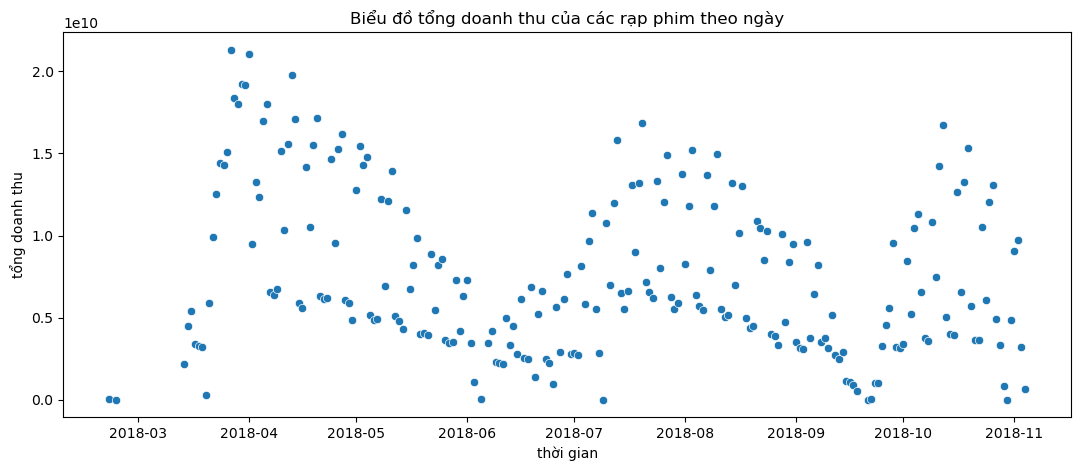

In [34]:
plt.figure(figsize = (13, 5))
sns.scatterplot(data = temp, x = 'date', y = 'total_sales')
plt.xlabel('thời gian')
plt.ylabel('tổng doanh thu')
plt.title('Biểu đồ tổng doanh thu của các rạp phim theo ngày')

**Nhận xét:**
- Biểu đồ cho ta thấy được phân bố tổng quát của các điểm dữ liệu theo thời gian.
- Nhìn hình ta có thể thấy, đồ thị tạo ra 3 đỉnh rõ ràng và gần như không có outlier, không có điểm nào nằm quá xa các điểm còn lại. Ngoài ra, đồ thị cũng có biên dưới thành lập 3 đỉnh như biên trên.
- Khi ở mức tổng doanh thu càng thấp, ta thấy rằng biên dưới và biên trên nằm rất gần nhau, còn khi đạt đỉnh, phân bố các điểm dữ liệu nằm cách xa nhau, như vậy ở mức doanh thu thấp thì biên dao động doanh thu giữa các ngày càng thấp.

**Lý do chọn biểu đồ:**
- Biểu đồ scatter từ matplotlib hoặc seaborn chỉ cho biết phân bố và vị trí đại khái của điểm dữ liệu.
- Nếu dùng plotly để vẽ biểu đồ thì ta có thể xác định được chính xác điểm dữ liệu là của ngày nào, có giá trị bao nhiêu.

In [35]:
fig = px.scatter(temp, x = 'date', y = 'total_sales', 
              title='Biểu đồ tổng doanh thu của các rạp phim theo ngày')

fig.update_layout(xaxis_title='thời gian',
                  yaxis_title='Tổng doanh thu')

fig.show()


**Nhận xét:**
- Ở biểu đồ này ta có thể xem thêm được giá trị của từng điểm dữ liệu.

**Lý do chọn biểu đồ:**
- Tương tự biểu đồ ở trên, tuy nhiên ở đây sẽ thực hiện thay đổi màu sắc (peek out), cụ thể là thay đổi cho những ngày đạt đỉnh để tăng mức độ chú ý và dễ xác định hơn cho người dùng.
- Điểm ở đỉnh được xác định là điểm có giá trị lớn nhất trong 30 ngày trước và sau ngày đó.

In [36]:
temp['peak'] = 0
for i in temp['date'].values:
    i = pd.to_datetime(i)
    batch = temp[(temp['date'] > i - pd.DateOffset(days = 30)) & (temp['date'] < i + pd.DateOffset(days = 30))]
    if temp[temp['date'] == i]['total_sales'].values == max(batch['total_sales'].values):
        temp.loc[temp['date'] == i, 'peak'] += 1

In [37]:
fig = px.scatter(temp, x = 'date', y = 'total_sales',
              title='Biểu đồ tổng doanh thu của các rạp phim theo ngày')

fig.update_layout(xaxis_title='thời gian',
                  yaxis_title='Tổng doanh thu')

temp.loc[temp['peak'] == 0, 'color'] = 'blue'
temp.loc[temp['peak'] == 1, 'color'] = 'red'

fig.update_traces(marker_color = temp['color'])

fig.show()

**Nhận xét:**
- Nhìn vào biểu đồ ta có thể dễ dàng xác định được điểm ở đỉnh là những điểm nào đặc biệt là ngay cả trong trường hợp các đỉnh nằm sấp sỉ nhau khó quan sát.
- Sau khi thay đổi màu sắc của các điểm dữ liệu, người dùng muốn biết giá trị đỉnh của mỗi chu kỳ đồ thị chỉ cần để chuột vào vị trí đó để xem thông tin.
- Trong trường hợp bài này, có 3 đỉnh 27/3 với tổng doanh thu là 21.32B, 20/7 với tổng doanh thu 16.85, 12/10 với tổng doanh thu là 16.76.

**Lý do chọn biểu đồ:**
- Việc dùng biểu đồ đường dễ đưa ra những thông tin sai, tuy nhiên với số lượng điểm nhiều và dày đặc như scatter plot phía trên thì ta sẽ không nhìn thấy được mức độ dao động giữa các ngày. Vì thế ta sẽ dùng biểu đồ đường để quan sát mức độ dao động giữa các ngày gần nhau có dữ liệu cũng như xu hướng của chúng.

In [38]:
fig = px.line(temp, x = 'date', y = 'total_sales', 
              title='Biểu đồ xu hướng tổng doanh thu của các rạp phim theo ngày')

fig.update_layout(xaxis_title='thời gian',
                  yaxis_title='Tổng doanh thu')

fig.show()

**Nhận xét:**
- 3 đỉnh của biểu đồ thấp dần theo thời gian, điều này không chứng tỏ là mọi người không còn thích xem phim nữa do dữ liệu chỉ có trong cuối thàng 2 đến tháng 11, chưa được 1 năm. Như vậy trong năm có thể các đỉnh ngày càng thấp nhưng so với đỉnh năm sau lại có thể cao hơn.
- Điều này có thể tạm kết luận là nhu cầu xem phim càng giảm vào dịp cuối năm nhưng vẫn có thể là trend tăng trong dài hạn.
- Cũng như nhận xét ở phần trên, các ngày có doanh thu càng cao thì độ biến thiên về tổng doanh thu của các ngày gần đó cũng càng mạnh.

### Làm mịn dữ liệu cho đồ thị xu hướng về doanh thu của các rạp phim theo ngày

**Trường dữ liệu:**
- `total_sales`, `date`

**Lý do chọn biểu đồ:**
- Để quan sát xu hướng chính của dữ liệu nếu giảm bớt độ lỗi đi, ta có thể quan sát rõ các khoảng thời gian nào thì doanh thu cao nếu như trong khoảng thời gian đó doanh thu dao động quá nhiều.
- Tạo thêm dataframe mới **temp_data** để sử dụng, cột **smooth** là giá trị của cột **total_sales** sau khi làm mịn với **window = 15**

In [39]:
temp_data = temp.copy()
temp_data['smooth'] = temp['total_sales'].rolling(window = 15).mean()

fig = px.line(temp_data, x = 'date', y = 'smooth', 
              title='Tổng doanh thu của các rạp phim theo ngày làm mịn với window = 15')

fig.update_layout(xaxis_title='thời gian',
                  yaxis_title='Tổng doanh thu')

fig.show()

**Nhận xét:**
- Nhìn vào biểu đồ lúc này ra thấy rõ biểu đồ hình thành 3 đỉnh và 2 đáy, 2 bên đầu và cuối biểu đồ do không có dữ liệu nên ta sẽ không kết luận được đố là đáy.
- Ta có thể thấy xu hướng doanh thu là tăng rất đột ngột và nhanh (độ dốc cao), chu kỳ tăng chỉ kéo dài trong nửa tháng rồi giảm chậm kéo dài khoảng 2 tháng sau đó sẽ đạt đáy.
- 3 đỉnh của đồ thị này đều không phải đỉnh thật sự trong dữ liệu (trong biểu đồ scatter có sử dụng pop out), điều này bởi lẽ kỹ thuật làm trơn này mỗi điểm dữ liệu sẽ có số liệu là trung bình của những ngày gần đó, nếu như theo như đỉnh cũ thì có thể thấy phía bên trái sườn dốc có độ dốc khá lớn vì thế nếu làm trơn thì giá trị sẽ bị giảm đi nhiều, thay vào đó đỉnh mới sau khi làm trơn là điểm nằm bên phải sườn dốc gần đỉnh cũ.

### Vậy chu kỳ của dữ liệu như thế nào nếu ta loại bỏ bớt tính xu hướng và độ lỗi trong biểu đồ

**Trường dữ liệu:**
- `smooth` (cột total_sales được làm mịn), `date`

**Lý do chọn biểu đồ:**
- Cũng là để xem xu hướng của chu kỳ thì các biểu đồ xu hướng dùng biểu đồ đường là hợp lý nhất.

In [40]:
temp_detrend = (temp_data['smooth'] - temp_data['smooth'].rolling(window=10).mean()) / temp_data['smooth'].rolling(window=10).std()
temp_detrend.index = temp['date']
# temp_detrend = (temp['total_sales'] - temp['total_sales'].rolling(window=12).mean()) / temp['total_sales'].rolling(window=12).std()
temp_detrend.head()
fig = px.line(temp_detrend, x = temp_detrend.index, y = temp_detrend.values, title = 'Biểu đồ tổng doanh thu của các rạp phim đã làm mịn với window = 10 và loại bỏ xu hướng')

fig.update_layout(xaxis_title='thời gian',
                  yaxis_title='Tổng doanh thu')

fig.show()

**Nhận xét:**
- Biểu đồ này, window càng cao thì biểu đồ càng mịn, tuy nhiên thì sẽ làm mất những dữ liệu ở khoảng đầu và khoảng cuối.
- Quan sát ở đây ta cũng thấy độ lỗi (tương tự như mức độ dao động), biểu đồ chia rõ những khu vực nào doanh thu cao hoặc thấp bởi ở những ngày doanh thu cao thì độ dao động cũng càng cao.

### Thay vì tách và làm mịn thủ công như trên, ta dùng thư viện thì kết quả như thế nào?

**Trường dữ liệu:**
- `date`, `total_sales`

**Lý do chọn phương pháp:**
- Việc tách thủ công tốn khá nhiều thời gian và phải xác định window là bao nhiêu là hợp lý, ngoài ra cũng khá phức tạp về công thức và kỹ thuật vì thế chúng ta dùng model của statsmodels để tiết kiệm thời gian.
- Một lưu ý trong **seasonal_decompose** thì các ngày trong dữ liệu phải liên tục vì thế mà ta phải thực hiện điền dữ liệu vào trước khi đưa vào mô hình.

Tạo DataFrame train để sử dụng cho mục này

In [41]:
train = pd.DataFrame(index = temp['date'], data = temp['total_sales'].values, columns = ['total_sales'])

Điền vào những dữ liệu thiếu với dữ liệu khớp với biểu đồ đường, nghĩa là 2 ngày cạnh ngày bị thiếu trong biểu đồ đường được nối lại thì tại điểm bị thiếu giá trị sẽ được gán bằng với vị trí đồ thị chiếu lên trục y

In [42]:
fill_data = pd.DataFrame(index = ['total_sales'])
i = train.index[0]
while i < train.index[-1]:
    if i not in train.index:
        prev = i - pd.DateOffset(days=1)
        while prev not in train.index:
            prev = prev - pd.DateOffset(days=1)
        next_ = i + pd.DateOffset(days=1)
        while next_ not in train.index:
            next_ = next_ + pd.DateOffset(days=1)
        
        val = (train.loc[prev][0] * (next_ - i).days + train.loc[next_][0] * (i - prev).days) / (next_ - prev).days
        fill_data[i.strftime('%Y-%m-%d')] = round(val)
    i += pd.DateOffset(days=1)
fill_data = fill_data.T
train = pd.concat([train, fill_data])
train.index = pd.to_datetime(train.index)
train = train.sort_index()

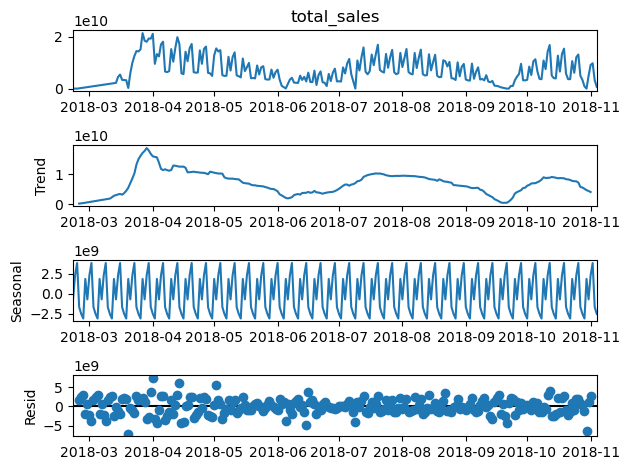

In [43]:
result = seasonal_decompose(train['total_sales'], model='additive')
result.plot()
plt.show()

**Nhận xét:**
- Như kết quả mô hình trả về sẽ gồm 4 thông tin, dữ liệu gốc, trend (tương tự với dữ liệu được làm mịn), seasonal (chu kỳ), resid (độ lỗi của dữ liệu)

### Vậy chu kỳ của dữ liệu được mô hình tìm ra như thế nào?

**Trường dữ liệu:**
- Thành phần seasonal được tách ra từ mô hình.

**Lý do chọn biểu đồ**
- Để xem biến động trong mỗi chu kỳ, tuy nhiên chu kỳ khá ngắn nhưng lại chứa giá trị âm đối với dữ liệu lấy từ mô hình. Vì thế nên ở đây sẽ chọn biểu đồ đường.

In [44]:
seasonal = result.seasonal
f = seasonal[seasonal.values == seasonal.max()]
f = (f.index[1] - f.index[0]).days
print(f'Theo như mô hình, dữ liệu có tính chu kỳ với độ dài là {f} ngày')

Theo như mô hình, dữ liệu có tính chu kỳ với độ dài là 7 ngày


Thực hiện chuyển từ ngày sang thứ trong tuần

In [45]:
f = pd.DataFrame(index = seasonal.index, data = seasonal.values, columns = ['values'])
f['weekday'] = (pd.Series(seasonal.index).dt.day_name()).values
index_monday = f[f['weekday'] == 'Monday'].index[0]
index_sunday = f[(f['weekday'] == 'Sunday') & (f['weekday'].index > index_monday)].index[0]
f = f.loc[index_monday : index_sunday]

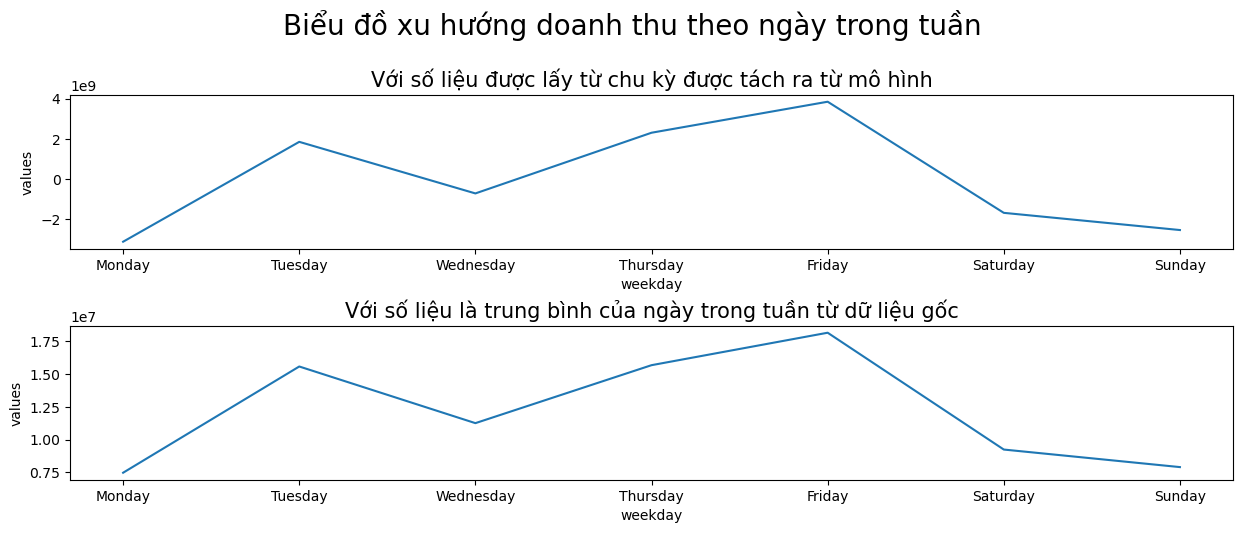

In [46]:
plt.figure(figsize = (15, 5))
plt.subplot(2, 1, 1)
sns.lineplot(data = f, x = 'weekday', y = 'values')
plt.title('Với số liệu được lấy từ chu kỳ được tách ra từ mô hình', fontsize = 15)
plt.ylabel('values')
plt.subplot(2, 1, 2)
temp = data.copy()
temp['weekday'] = data['date'].dt.day_name()
temp = temp.groupby([temp['date'].dt.day_of_week, temp['weekday']]).agg({'total_sales': 'mean'})
sns.lineplot(data = temp, x = 'weekday', y = 'total_sales')
plt.title('Với số liệu là trung bình của ngày trong tuần từ dữ liệu gốc', fontsize = 15)
plt.suptitle('Biểu đồ xu hướng doanh thu theo ngày trong tuần', fontsize = 20, y = 1.05)
plt.ylabel('values')
plt.subplots_adjust(hspace = 0.5)

**Nhận xét:**
- Ta thấy 2 biểu đồ là hoàn toàn như nhau về trend, chỉ khác nhau về giá trị, điều này cũng là khá thú vị.
- Từ biểu đồ có thể thấy được thứ 3 và thứ 6 các rạp thường có doanh thu cao có thể do thường có ưu đãi trong 2 ngày này. Điêu đáng bất ngờ ở đây là ở 2 ngày nghỉ thứ 7 và chủ nhật doanh thu cực thấp, như vậy thì có một câu hỏi được đặt ra là có phải vào những ngày nghỉ người ta thường dành nhiều thời gian cho gia đình hoặc ăn uống nhiều hơn không.

<Axes: ylabel='resid'>

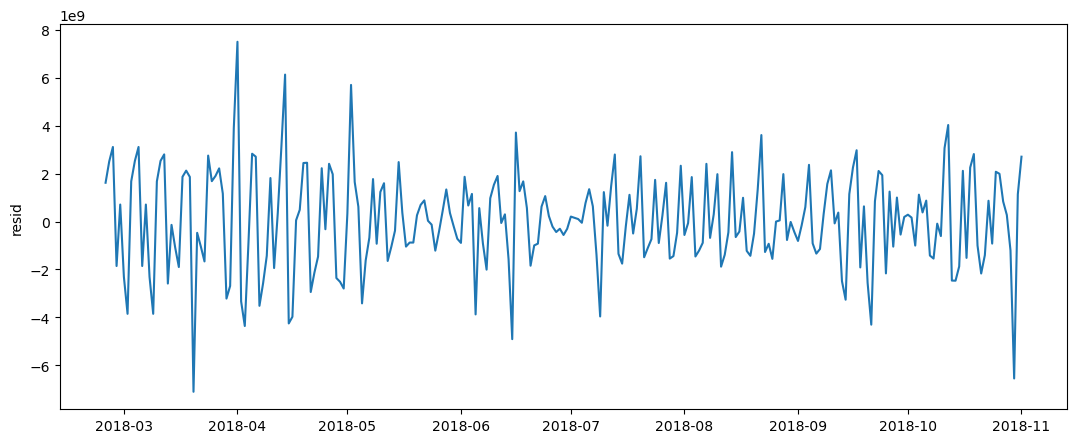

In [47]:
plt.figure(figsize = (13, 5))
sns.lineplot(data = result.resid)

### Vậy xu hướng của dữ liệu được mô hình tìm ra như thế nào?

**Trường dữ liệu:**
- result.trend với result là kết quả từ mô hình seasonal_decompose.

**Lý do chọn biểu đồ:**
- Để xem xu hướng và so sánh với các biểu đồ được vẽ phía trên.

In [48]:
fig = px.line(result.trend, title = 'Biểu đồ xu hướng của tổng doanh thu theo ngày')

fig.update_layout(xaxis_title='thời gian',
                  yaxis_title='Tổng doanh thu')

fig.show()

**Nhận xét:**
- Đỉnh của 3 đồ thị (đồ thị từ dữ liệu gốc, đồ thị làm trơn bằng window và đồ thị xu hướng từ mô hình) đều có 3 đỉnh khác nhau, tuy nhiên nó cũng gần nhau và nhìn thì cũng không khác nhau mấy.

### Mô hình dự đoán doanh thu bằng ARIMA

Chuẩn bị dữ liệu cho quá trình huấn luyện

In [49]:
trend = result.trend.dropna()
trend = pd.DataFrame(index = trend.index, data = trend.values, columns = ['total_sales'])

**Reference: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/**

#### Bước 1: Xác định bậc sai phân (d) trong mô hình ARIMA

**Trường dữ liệu:**
- `trend` được tách từ mô hình, `total_values`

**Lý do chọn biểu đồ:**
- Dùng biểu đồ đường để xem xu hướng của dữ liệu trong từng trường hợp.
- Biểu đồ acf để vẽ Autocorrelation
- Dùng trend thay vì dùng dữ liệu gốc vì mô hình không hợp với dữ liệu có tính chu kỳ.

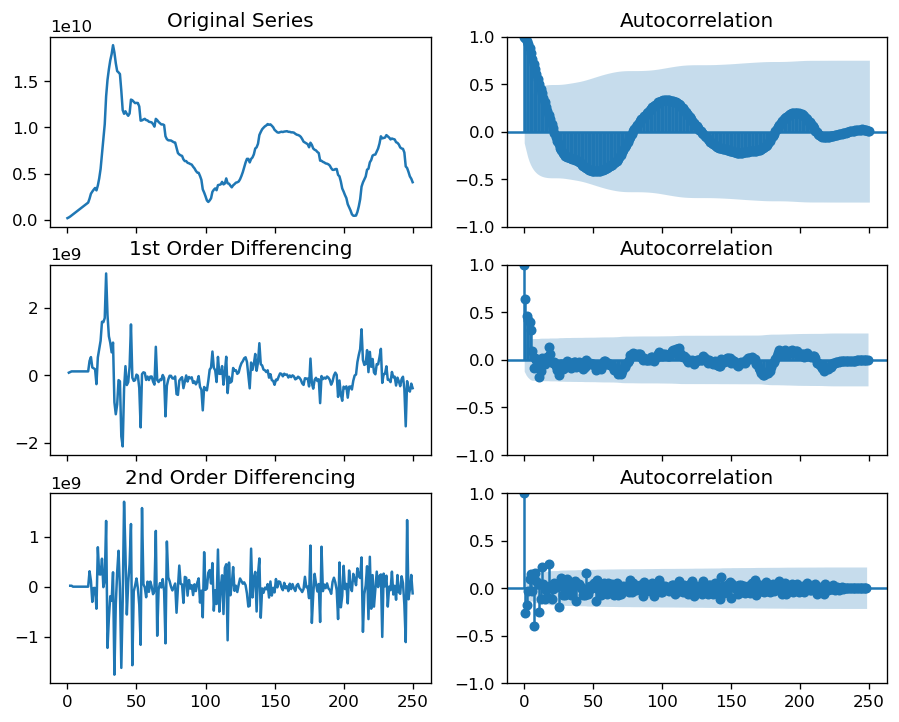

In [50]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = trend.copy().reset_index()

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.total_sales); axes[0, 0].set_title('Original Series')
plot_acf(df.total_sales, lags = len(df.index) - 1, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.total_sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.total_sales.diff().dropna(), lags = len(df.index) - 2, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.total_sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.total_sales.diff().diff().dropna(), lags = len(df.index) - 3, ax=axes[2, 1])

plt.show()

**Nhận xét:**
- Khi nhìn vào biểu đồ tự tương quan cho sự khác biệt thứ 2, độ trễ đi vào vùng âm xa khá nhanh, điều đó cho thấy, chuỗi có thể đã bị chênh lệch quá mức. Vì vậy sẽ sửa thứ tự chênh lệch thành d = 1 mặc dù chuỗi không hoàn toàn dừng (độ dừng yếu).

#### Bước 2: Xác định thứ tự của số hạng AR (p)

**Trường dữ liệu:**
- `trend` được tách từ mô hình, `total_values`

**Lý do chọn biểu đồ:**
- Dùng biểu đồ đường để xem xu hướng của dữ liệu trong từng trường hợp.
- Biểu đồ pacf để vẽ Partial Autocorrelation
- Dùng trend thay vì dùng dữ liệu gốc vì mô hình không hợp với dữ liệu có tính chu kỳ.

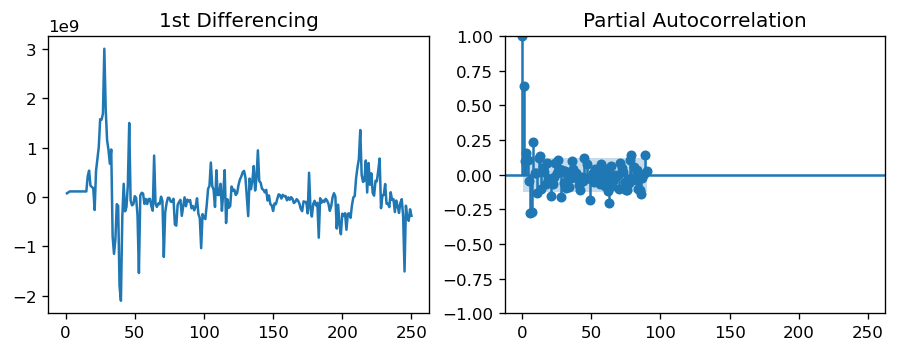

In [51]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.total_sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['total_sales'].diff().dropna(), ax=axes[1], lags = 90)

plt.show()

**Nhận xét:**
- Độ trễ 1 và 2 của PACF quan trọng vì nằm trên đường ý nghĩa, còn độ trễ 3 nằm trong đường ý nghĩa. Vì thế ta chọn độ trễ p = 2.

#### Bước 3: Tìm bậc của số hạng MA (q)

**Trường dữ liệu:**
- `trend` được tách từ mô hình, `total_values`

**Lý do chọn biểu đồ:**
- Dùng biểu đồ đường để xem xu hướng của dữ liệu trong từng trường hợp.
- Biểu đồ pacf để vẽ Partial Autocorrelation
- Dùng trend thay vì dùng dữ liệu gốc vì mô hình không hợp với dữ liệu có tính chu kỳ.

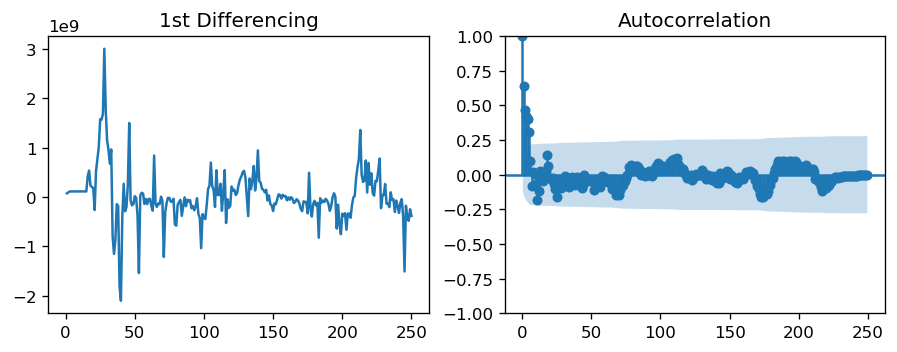

In [52]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.total_sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.total_sales.diff().dropna(), ax=axes[1], lags = len(df.index) - 2)

plt.show()

**Nhận xét:**
- Có đến tận 4 lags nằm trên đường ý nghĩa, vì thế thử dùng q = 4 cho mô hình,

#### Bước 4: Xây dựng mô hình ARIMA

In [53]:
model = ARIMA(trend['total_sales'], order=(2, 1, 4))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observations:                  251
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -5292.686
Date:                Mon, 15 May 2023   AIC                          10599.373
Time:                        19:29:20   BIC                          10624.023
Sample:                    02-24-2018   HQIC                         10609.294
                         - 11-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9903      0.318      3.118      0.002       0.368       1.613
ar.L2         -0.3076      0.254     -1.209      0.227      -0.806       0.191
ma.L1         -0.4955      0.320     -1.547      0.1

**Nhận xét:**
- Nhìn vào cột P > |z| thì ta cần các giá trị đó càng gần 0 càng tốt và < 0.05, vì thế mà mô hình hiện tại vẫn chưa đáp ứng mong đợi. Ta thực hiện thử các giá trị khác bằng việc giảm p và q thì tìm được bộ giá trị (1, 1, 1) khớp tốt với mô hình.

In [54]:
model = ARIMA(trend['total_sales'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5302.178
Date:                Mon, 15 May 2023   AIC                          10610.357
Time:                        19:29:20   BIC                          10620.921
Sample:                    02-24-2018   HQIC                         10614.609
                         - 11-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7943      0.042     18.733      0.000       0.711       0.877
ma.L1         -0.2766      0.068     -4.051      0.000      -0.410      -0.143
sigma2      1.577e+17        nan        nan        n

**Nhận xét:**
- Các giá trịn trong cột P > |z| đã được cải thiện (< 0.05).

**Bước 5: Dùng mô hình để dự đoán 10 ngày kế tiếp.**

**Trường dữ liệu:**
- `trend` từ mô hình và `total_sales`.

**Lý do chọn biểu đồ:**
- Trực quan xu hướng tăng giảm của tổng doanh thu.

Text(0.5, 1, 'Mô hình dự đoán doanh thu trong 10 ngày tiếp theo bằng ARIMA')

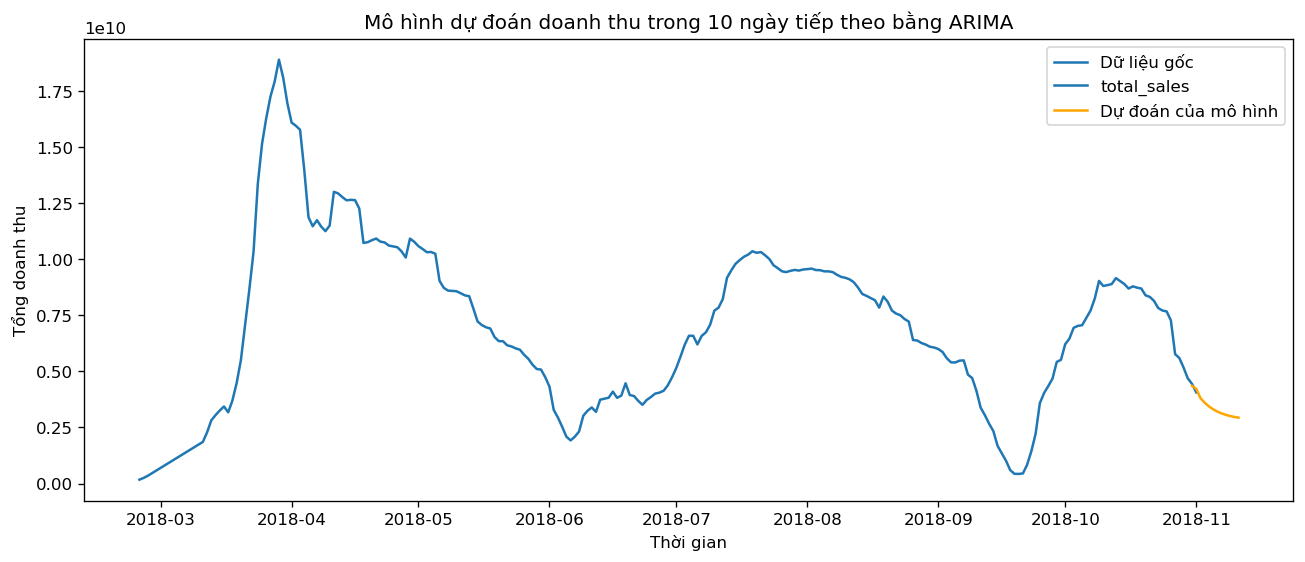

In [55]:
predictions = model_fit.predict(start = trend.index[-1] - pd.DateOffset(days = 1), end = trend.index[-1] + pd.DateOffset(days = 10))

plt.figure(figsize = (13, 5))
sns.lineplot(data = trend, label = 'Dữ liệu gốc', color = 'blue')
sns.lineplot(data = predictions, label = 'Dự đoán của mô hình', color = 'orange')
plt.xlabel('Thời gian')
plt.ylabel('Tổng doanh thu')
plt.title('Mô hình dự đoán doanh thu trong 10 ngày tiếp theo bằng ARIMA', y = 1)

**Nhận xét:**
- Chỉ dự đoán cho một khoảng nhỏ thời gian do mô hình này dự đoán càng xa thì độ lệch so với dữ liệu thật càng tăng.
- Từ việc dự đoán cho thấy trong khoảng thời gian sắp tới, doanh thu của các rạp phim sẽ giảm.

references: 
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
- https://plotly.com/python/subplots/
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html#statsmodels.tsa.stattools.acf
- https://pandas.pydata.org/docs/reference/api/pandas.CategoricalIndex.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html
- https://towardsdatascience.com/time-series-analysis-with-statsmodels-12309890539a